# Fresnel diffraction.

In [14]:
from IPython.display import HTML
HTML('''
        <style>
                .prompt{display: None;}
                
                .output_wrapper button.btn.btn-default,
                .output_wrapper .ui-dialog-titlebar {display: none;} <!-- hide toolbars and buttons of the plot -->
                
        </style>
        <script>
                code_show=true; 
                function code_toggle() 
                {
                     if (code_show)
                     {
                         $('div.input').hide();
                     } else
                     {
                         $('div.input').show();
                     }
                     code_show = !code_show
                } 
                $( document ).ready(code_toggle);
        </script>
        The raw code for this IPython notebook is by default hidden for easier reading.
        To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
        ''')



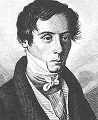*Auguste Fresnel, (Broglie, 1788 – Ville-d'Avray, 1827)*

Suppose that a monochromatic beam of light falls on a screen with a round
hole in it. At a certain distance from the hole a diffraction pattern
can be observed on a second screen. The structure of the pattern depends
on the wavelength, $λ$, and the phase distribution of the incoming wavefront
and also on the diameter, $d$, of the hole and the distance, $z$, from
the hole to the screen.

Here we study the case that $\frac{A}{\lambda}$ is larger than the distance to
the screen: $\frac{A}{\lambda}>z$, where $A=\frac{\pi}{4}d^2$ is the area of the hole.
In this so-called near field- or Fresnel diffraction regime a monochromatic plane or spherical wave 
that illuminates the hole will produce a diffraction pattern in the form of a set of concentric rings. 
The irradiance at the optical axis will be a minimum or a maximum when, at constant wavelength and hole 
diameter, the distance from the hole to the observation screen is reduced from inifinity to zero.

The rings appear after passing the critical distance
(also called the Rayleigh length) :$z_R =\frac{A}{\lambda}$.
If $z > z_R$ no rings but a smooth irradiance distribution in the form
of a squared Bessel function is observed of which the shape
(but not the beam diameter) remains constant while increasing z.
This far-field is also called Fraunhofer diffraction (Pedrotti chapter 11).

Whether a maximum or a minimum appears on the optical axis can be
understood using the Fresnel zone theory (Pedrotti, 13-4).
If the number of half-lambda zones ‘seen’ by the observer is odd a
maximum is observed, an even number of zones produces a minimum irradiance.
The number of Fresnel zones is indicated by the Fresnel number, $N_F=\frac{z_R}{z}$.

In these experiments the distances where a maximum or minimum intensity
on the optical axis appear are measured. From these measurements the
wavelength of the light can be determined if the hole diameter is known.
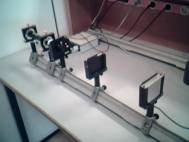
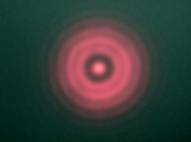
*The experimental set-up in the lab is simple:
    it consists of a (HeNe) laser, a beam expander or a strong lens to
    produce a plane or a spherical wave, a screen with the hole
    and a CCD camera. All the components are mounted on an optical
    rail to adjust and measure distances easily.*

In this exercise two incoming wavefronts are considered: a plane wave
and a spherical wave.

Literature: Pedrotti, 3rd ed., chapter 13. https://www.amazon.com/Introduction-Optics-3rd-Frank-Pedrotti/dp/0131499335

### Fresnel diffraction, plane wavefront.
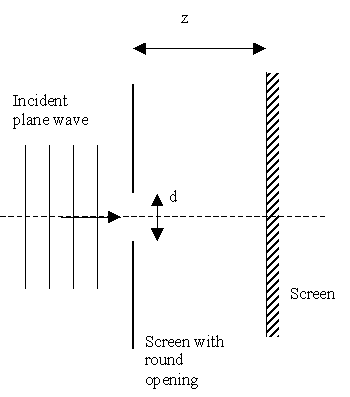
*Setup of the Fresnel diffraction experiment. A plane wave enters a round hole in a screen.*

   1. Show that at the optical axis maximum and minimum irradiances are observed for distances $z_m$ if:
      $\frac{1}{z_m}=\frac{4\lambda}{d^2}m$
       minima for: $m$ = even = 2, 4, 6, …
       maxima for: $m$= odd = 1, 3, 5, …
    2. Measure these positions for a number of values of the diameter, $d$, of the hole.
    3. Determine the value of the wavelength of the light from the measurements.





<IPython.core.display.Javascript object>


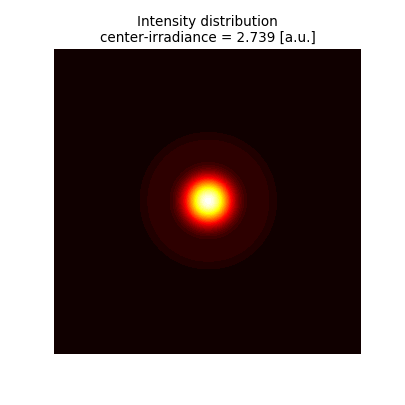

interactive(children=(FloatSlider(value=20.0, continuous_update=False, description='z [cm]', max=200.0, min=0.…

In [15]:
%matplotlib notebook
#!/usr/bin/env python
"""
    Computer practical 6.1. Fresnel diffraction, plane wavefront.
    =============================================================

    This is part of the 'computer practical' set of assignments.
    Demonstrates Fresnel diffraction when a plane wavefront enters 
    a round hole.
    Measure the values of z and d for which minima and/or maxima on-axis occur
    and apply the Fresnel-zone theory to find the wavelength of the light.
"""
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
from LightPipes import *

wavelength=530*nm;
size=5*mm;
N=200; N2=int(N/2)

fig=plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
#cursor = Cursor(ax,useblit=False, color='red', linewidth=2);
ax.format_coord = lambda x, y: 'x=%2.2f mm,y=%2.2f mm' % ((-size/2 + x*size/N)/mm, (size/2 - y*size/N)/mm)

def FresnelPlaneSim(z,d):
    global I
    F=Begin(size,wavelength,N)
    z=z*cm
    R=d/2*mm
    F=CircAperture(R,0,0,F)
    FN=R*R/z/wavelength
    if (FN >= 15.0):
        F=Forvard(z,F)
    else:
        F=Fresnel(z,F)
    I=Intensity(0,F)
    ax.contourf(I,50,cmap='hot'); ax.axis('off'); ax.axis('equal')
    str='Intensity distribution\ncenter-irradiance = %3.3f [a.u.]' %I[N2][N2]
    ax.set_title(str) 
    plt.show()

w=interact(FresnelPlaneSim,
           z=widgets.FloatSlider(description='z [cm]',min=0.01,max=200.0,step=0.01,value=20.0,continuous_update=False,readout_format='.1f'),
           d=widgets.FloatSlider(description='d [mm]',min=0.5,max=size/2/mm,step=0.001,value=0.5,continuous_update=False,readout_format='.1f'),
          );

help: https://opticspy.github.io/lightpipes/FresnelDiffraction.html

### Fresnel diffraction, spherical wavefront.
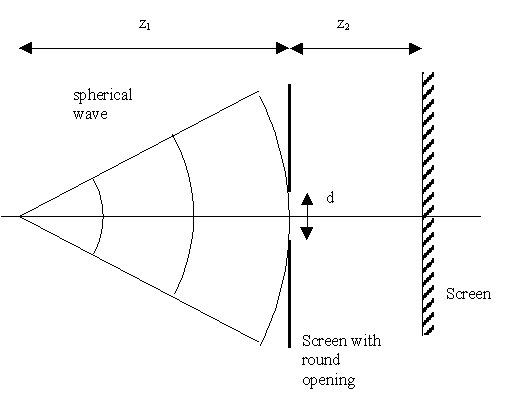
   1. Modify the equations for the positions of maximum and minimum
       irradiance on the optical axis behind the screen with the hole
       for the spherical wave and show that in this case these distances
       are given by:
       $\frac{1}{z_1} + \frac{1}{z_{2m}}=\frac{4\lambda}{d^2}m$
       minima for: $m$ = even = 2, 4, 6, …
       maxima for: $m$= odd = 1, 3, 5, …
    2. Measure these positions for a number of values of the diameter, $d$, of the hole and for the position, $z_1$, of the point source.
    3. Determine the value of the wavelength of the light from the measurements.

### Questions.

   1. What happens if the beam of light is not monochromatic but contains
       a large number of wavelengths?
   2. Look at the formula(s) you derived to explain the observations.
       Can you talk about some sort of imaging? Define an expression for 
       a 'focal length'. Hint: have a look at the pinhole  camera (Pedrotti 3-4).
   3. Find out what is meant with the "Fresnel Number".
       What is the irradiance on the optical axis when this number is odd and when it is even?
   4. Can you consider a diffraction pattern as an interference phenomenon? Why?


<IPython.core.display.Javascript object>


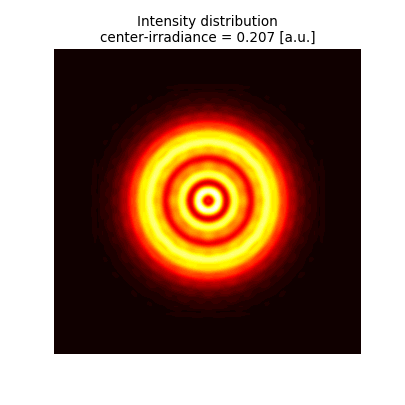

interactive(children=(FloatSlider(value=50.0, continuous_update=False, description='z1 [cm]', max=200.0, min=0…

In [19]:
%matplotlib notebook
#!/usr/bin/env python
"""
    Computer practical 6.2. Fresnel diffraction, spherical wavefront.
    =================================================================

    This is part of the 'computer practical' set of assignments.
    Demonstrates Fresnel diffraction when a spherical wavefront enters 
    a round hole.
    Measure the values of z1, z2 and d for which minima and/or maxima on-axis occur
    and apply the Fresnel-zone theory to find the wavelength of the light.
"""
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
from LightPipes import *
import math

wavelength=493*nm;
size=5*mm;
N=200; N2=int(N/2)

fig=plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
#cursor = Cursor(ax,useblit=False, color='red', linewidth=2);
ax.format_coord = lambda x, y: 'x=%2.2f mm,y=%2.2f mm' % ((-size/2 + x*size/N)/mm, (size/2 - y*size/N)/mm)

def FresnelSphericalSim(z1,z2,d):
    global I
    F=Begin(size,wavelength,N)
    z1=z1*cm
    z2=z2*cm
    R=d/2*mm
    F=CircAperture(R,0,0,F)
    F=Lens(-z1,0,0,F)
    FN=2/wavelength*(math.sqrt(z2*z2+R*R)-z2)
    if (FN >= 15.0):
        F=Forvard(z2,F)
    else:
        F=Fresnel(z2,F)
    I=Intensity(0,F)
    ax.contourf(I,50,cmap='hot'); ax.axis('off'); ax.axis('equal')
    str='Intensity distribution\ncenter-irradiance = %3.3f [a.u.]' %I[N2][N2]
    ax.set_title(str) 
    plt.show()

w=interact(FresnelSphericalSim,
           z1=widgets.FloatSlider(description='z1 [cm]',min=0.01,max=200.0,step=0.01,value=50.0,continuous_update=False,readout_format='.1f'),
           z2=widgets.FloatSlider(description='z2 [cm]',min=0.01,max=200.0,step=0.01,value=20.0,continuous_update=False,readout_format='.1f'),
           d=widgets.FloatSlider(description='d [mm]',min=0.5,max=size/2/mm,step=0.001,value=0.5,continuous_update=False,readout_format='.1f'),
          );

help: https://opticspy.github.io/lightpipes/FresnelDiffraction.html